Regression Techniques in Python

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import datetime as dt

Step 1: Fetching Stock Data

In [4]:
import yfinance as yf
import datetime as dt

start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2023, 12, 31)

amzn = yf.download('AMZN', start=start_date, end=end_date)

amzn.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000


Step 2: Data Preparation


In [5]:
# Prepare the features (X) and target (y)
X = amzn[['Open', 'High', 'Low', 'Volume']]  # Features
y = amzn['Close']  # Target

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Apply Simple Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)


Step 4: Evaluate the Model

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.1680754845782337
R-squared: 0.9985101018583702


Step 5: Visualize the Results

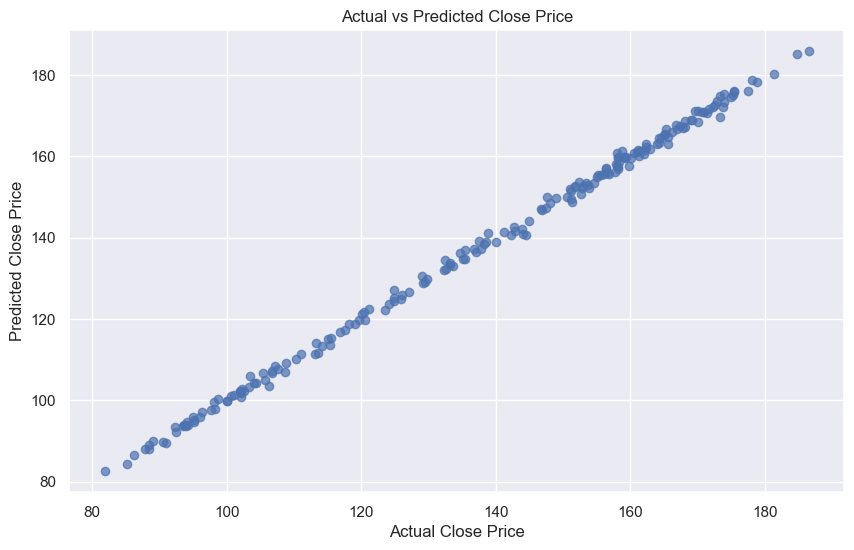

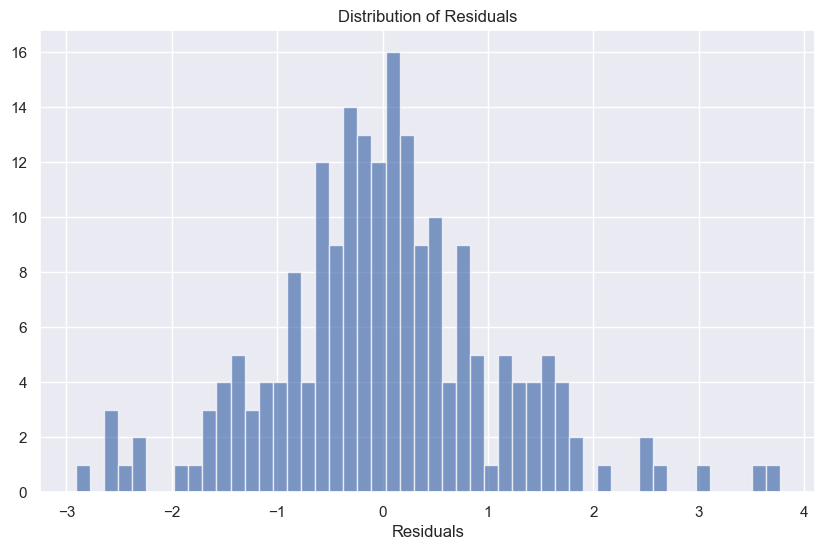

In [8]:
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.show()

# Plot the residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()
